<a href="https://colab.research.google.com/github/ah20776/CE802/blob/main/Results/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
sys.path.append("../")

%matplotlib inline
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
#Importing dataset saved in github
!git clone https://github.com/ah20776/CE802.git

fatal: destination path 'CE802' already exists and is not an empty directory.


In [3]:
#load P3 csv data
df = pd.read_csv('/content/CE802/CE802_P3_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,High,UK,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,Medium,UK,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,Low,Rest,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
3,16.33,2.76,-8.40,High,Rest,0.12,-196.88,42.45,-12.16,12,1.29,6,1461.87,9.19,22518.15,-1100.35,0.00
4,-14.93,9.98,-5.28,Medium,USA,557.61,-249.50,76.25,-20.54,8,2.58,2,-433.89,18.44,20111.46,-752.48,0.00


***ENCODING***

In [4]:
# encoding F5 and F4 
df['F5'] = df['F5'].astype('category')
df['F5'] = df['F5'].cat.codes

replace_map = {'F4': {'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4 }}
df.replace(replace_map, inplace=True)

#deleting the records where Target is zero
df = df.drop(df[df.Target == 0].index)

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.32,5.72,-13.83,3,2,0.03,-200.46,122.09,-2.96,6,2.67,8,607.14,19.19,10523.40,-635.80,1051.99
1,-29.38,8.20,-11.07,2,2,56.97,-427.78,74.25,-22.94,4,3.84,10,867.03,12.65,10037.04,-469.73,816.64
2,2.46,20.32,-7.59,1,1,45.00,-329.02,96.98,-10.90,4,13.14,8,-153.66,13.01,15100.28,-662.31,3241.77
5,12.34,3.84,-18.00,1,0,0.87,-74.46,66.70,-18.46,4,15.51,8,-515.55,11.21,10234.20,-290.43,91.90
7,-13.62,5.40,-16.77,2,1,4.38,-201.54,91.12,-13.30,6,5.34,6,1621.71,15.96,14760.40,-1029.52,273.70


***Finding feature importance using Linear Regression***

In [5]:
X = df.drop(['Target'], axis=1)
y = df.Target

lr = LinearRegression()
lr.fit(X, y)

importance = lr.coef_

# summarizing feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.58005
Feature: 1, Score: 77.33392
Feature: 2, Score: 0.59859
Feature: 3, Score: 208.85675
Feature: 4, Score: 176.72470
Feature: 5, Score: -0.00109
Feature: 6, Score: -0.21463
Feature: 7, Score: 18.96867
Feature: 8, Score: 3.75216
Feature: 9, Score: -94.06748
Feature: 10, Score: 51.73850
Feature: 11, Score: 74.63410
Feature: 12, Score: 0.45466
Feature: 13, Score: -1.05902
Feature: 14, Score: 0.00477
Feature: 15, Score: 1.10653


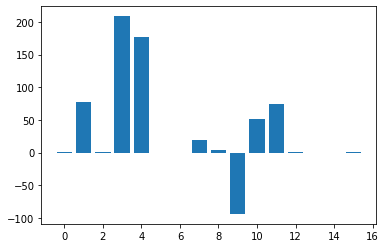

In [6]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


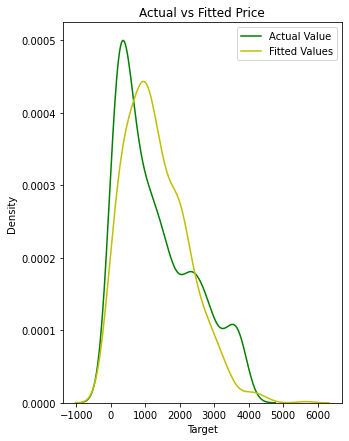

Score of the Linear Regressor:  0.7086722908448713


In [7]:
plt.figure(figsize=(5, 7))

y_pred = lr.predict(X)

ax = sns.distplot(y, hist=False, color="g", label="Actual Value")
sns.distplot(y_pred, hist=False, color="y", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Price')

plt.legend()
plt.show()
plt.close()

print('Score of the Linear Regressor: ', lr.score(X,y))

***Predicting Sales using Random Forest Regressor***

In [8]:
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X, y)

y_pred_reg = regressor.predict(X)


rdf=pd.DataFrame({'Actual':y, 'Predicted':y_pred_reg, 'Percentage error': 100*(abs(y-y_pred_reg)/np.maximum.reduce([y_pred,y]))})
rdf.head()

,Actual,Predicted,Percentage error
0,1051.99,1166.88358,8.783018
1,816.64,819.94022,0.308649
2,3241.77,2873.26033,11.367545
5,91.90,169.64343,84.595680
7,273.70,431.64597,48.895374


In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred_reg)))

Mean Absolute Error: 183.88278841405526
Mean Squared Error: 56135.89795926908
Root Mean Squared Error: 236.93015417896703


***ACCURACY - RANDOM FOREST***

In [10]:
# absolute error
errors = abs(y_pred_reg-y)
max_vals = np.maximum.reduce([y_pred_reg,y])

# mean absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.4 %.


***Plotting Actual vs Fitted Price from Random Forest Regressor***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


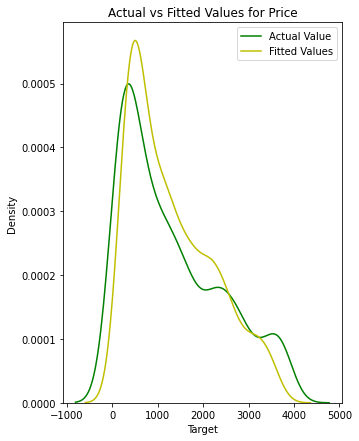

In [11]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="g", label="Actual Value")
sns.distplot(y_pred_reg, hist=False, color="y", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')

plt.legend()
plt.show()
plt.close()

***Predicting Sales using SVM***

In [12]:
SVM_regressor = SVR(kernel = 'poly')
SVM_regressor.fit(X, y)

y_pred_svm = SVM_regressor.predict(X)


rdf=pd.DataFrame({'Actual':y, 'Predicted':y_pred_svm, 'Percentage error': 100*(abs(y-y_pred_svm)/np.maximum.reduce([y_pred,y]))})
rdf.head()

,Actual,Predicted,Percentage error
0,1051.99,1018.455597,2.563531
1,816.64,1018.313803,18.861288
2,3241.77,1023.271269,68.434797
5,91.90,1017.079852,1006.724539
7,273.70,1026.422372,233.020454


***ACCURACY - SVM***

In [13]:
# absolute errors
errors = abs(y_pred_svm-y)
max_vals = np.maximum.reduce([y_pred_svm,y])

# absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 47.66 %.


***Predicting Sales using KNN***


In [14]:
df1 = df

train , test = train_test_split(df1, test_size = 0.2)

x_train = train.drop('Target', axis=1)
y_train = train['Target']

x_test = test.drop('Target', axis = 1)
y_test = test['Target']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#standardize the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train_scaled, y_train)  #fit the model
    y_pred_knn=model.predict(x_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred_knn)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1056.848581384041
RMSE value for k=  2 is: 880.9266945942863
RMSE value for k=  3 is: 840.2300756395331
RMSE value for k=  4 is: 824.4449750041164
RMSE value for k=  5 is: 796.893730773843
RMSE value for k=  6 is: 783.9576484780459
RMSE value for k=  7 is: 781.4086968107069
RMSE value for k=  8 is: 797.88622804186
RMSE value for k=  9 is: 783.161821982484
RMSE value for k=  10 is: 781.8770034089495
RMSE value for k=  11 is: 767.6720568923708
RMSE value for k=  12 is: 775.7074792333595
RMSE value for k=  13 is: 782.0774738136658
RMSE value for k=  14 is: 791.1307592808876
RMSE value for k=  15 is: 796.2041062249664
RMSE value for k=  16 is: 798.259637183746
RMSE value for k=  17 is: 805.7376626394386
RMSE value for k=  18 is: 802.9893673074646
RMSE value for k=  19 is: 805.5051286475108
RMSE value for k=  20 is: 808.3476230943941


***ACCURACY - KNN***

In [15]:
#select k=8
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 8)

knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled) #make prediction on test set

# absolute errors
errors = abs(y_pred_knn-y_test)
max_vals = np.maximum.reduce([y_pred_knn,y_test])

# mean absolute percentage error (MAPE)
mape = 100 * (errors / max_vals)
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 58.99 %.


***a) Best performance - RANDOM FOREST CLASSIFIER with 79.4%***

***b) Prediction on hold-out test set.***

In [16]:
# test data
df_test = pd.read_csv('/content/CE802/CE802_P3_Test.csv')
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,Very high,UK,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,Very low,Rest,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,Very low,Europe,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,Very low,UK,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,Medium,USA,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [17]:
# encoding F5 and F4 
df_test['F5'] = df_test['F5'].astype('category')
df_test['F5'] = df_test['F5'].cat.codes

replace_map = {'F4': {'Very low':0, 'Low':1, 'Medium':2, 'High':3, 'Very high':4 }}
df_test.replace(replace_map, inplace=True)

df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,4,2,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,NaN
1,-39.37,7.72,-3.48,0,1,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,NaN
2,16.25,7.08,-5.31,0,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,NaN
3,23.08,5.82,-5.91,0,2,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,NaN
4,-21.30,15.14,-4.02,2,3,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,NaN


In [18]:
#dividing data into features
X_test = df_test.drop(['Target'], axis=1)

y_test_pred = regressor.predict(X_test)

df_test['Target'] = y_test_pred

df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,-39.37,4.22,-4.05,4,2,83.43,-209.02,101.94,-17.16,2,7.89,10,2373.57,13.11,30843.16,-962.72,1484.06961
1,-39.37,7.72,-3.48,0,1,48.30,86.62,107.56,-11.00,18,1.86,10,1475.76,11.71,15657.13,-305.24,1370.11014
2,16.25,7.08,-5.31,0,0,1.98,-267.34,23.33,-14.66,8,25.92,6,192.93,17.60,10765.05,-857.16,377.65966
3,23.08,5.82,-5.91,0,2,11.49,-196.52,115.19,-12.14,2,12.87,0,2779.23,13.59,14778.80,-798.06,1532.65778
4,-21.30,15.14,-4.02,2,3,0.60,-80.36,75.42,-8.86,10,4.26,8,-441.42,13.62,16328.25,-832.93,908.41422


***CE802_P3_TEST - DOWNLOAD***

In [19]:
from google.colab import files
df_test.to_csv('CE802_P3_Test.csv') 
files.download('CE802_P3_Test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>